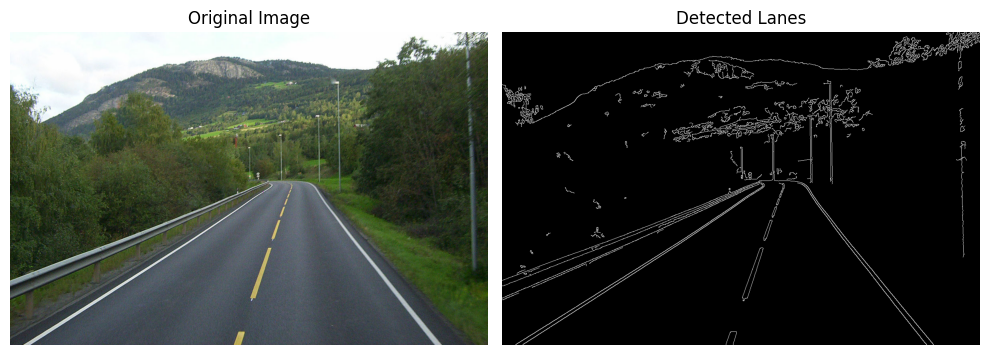

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('lane3.jpg')
lane_image = np.copy(image)

lane_image_rgb = cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(lane_image_rgb)
plt.title('Original Image')
plt.axis('off')

gray = cv2.cvtColor(lane_image, cv2.COLOR_BGR2GRAY)

blur = cv2.GaussianBlur(gray, (5, 5), 0)

edges = cv2.Canny(blur, 50, 150)

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Detected Lanes')
plt.axis('off')

plt.tight_layout()
plt.show()

In [2]:
height, width = edges.shape
polygons = np.array([[
    (0, height),
    (width, height),
    (width // 2, int(height //2))
]])
mask = np.zeros_like(edges)
cv2.fillPoly(mask, polygons, 255)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0, 255, ..., 255, 255,   0],
       [  0, 255, 255, ..., 255, 255, 255]],
      shape=(786, 1200), dtype=uint8)

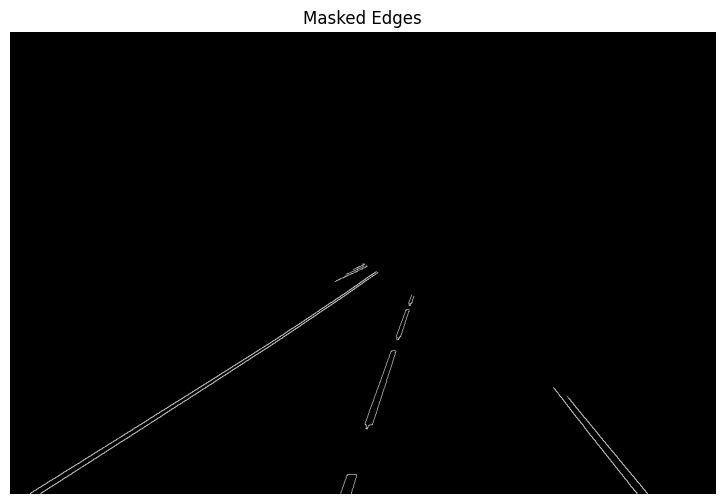

In [3]:
masked_edges = cv2.bitwise_and(edges, mask)

plt.figure(figsize=(10, 6))
plt.imshow(masked_edges, cmap='gray')
plt.title('Masked Edges')
plt.axis('off')
plt.show()

lines = cv2.HoughLinesP(
    masked_edges,
    rho=2,
    theta=np.pi/180,
    threshold=50,
    minLineLength=40,
    maxLineGap=100
)

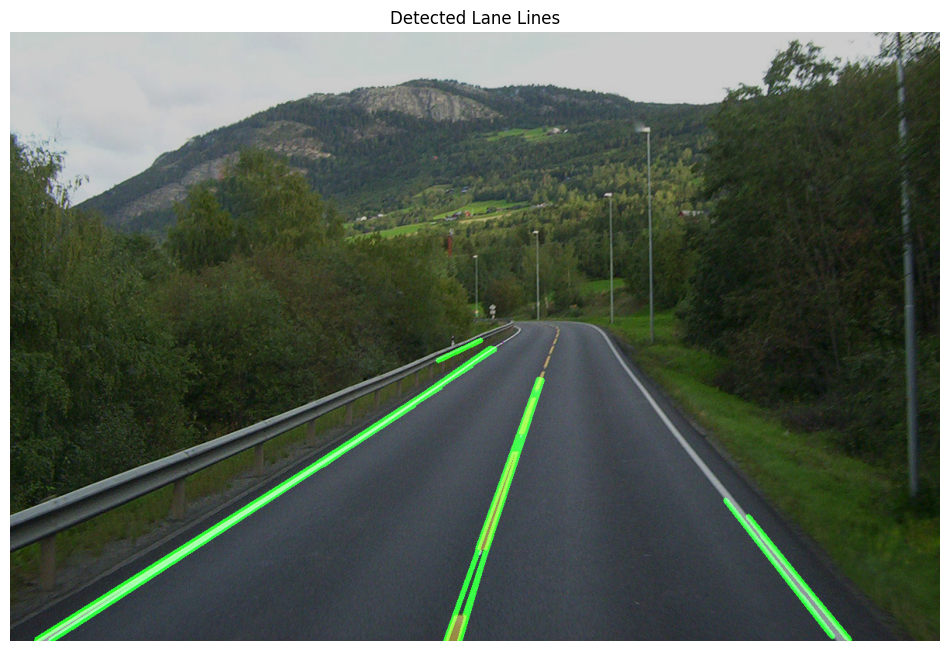

In [4]:
# Draw lines on a blank image

line_image = np.zeros_like(image)

if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)

combo_image = cv2.addWeighted(image, 0.8, line_image, 1, 1)

# Convert BGR to RGB for matplotlib display
combo_image_rgb = cv2.cvtColor(combo_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(combo_image_rgb)
plt.title('Detected Lane Lines')
plt.axis('off')
plt.show()

In [5]:
edges.shape[0]

786

In [6]:
image.shape

(786, 1200, 3)

In [7]:
!pip install imutils

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25870 sha256=cb5f5090006a0a0e42c63a94f4b4815399a9caa756aa1699e674aab9f73bce13
  Stored in directory: /Users/zara/Library/Caches/pip/wheels/5b/76/96/ad0c321506837bef578cf3008df3916c23018435a355d9f6b1
Successfully built imutils

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


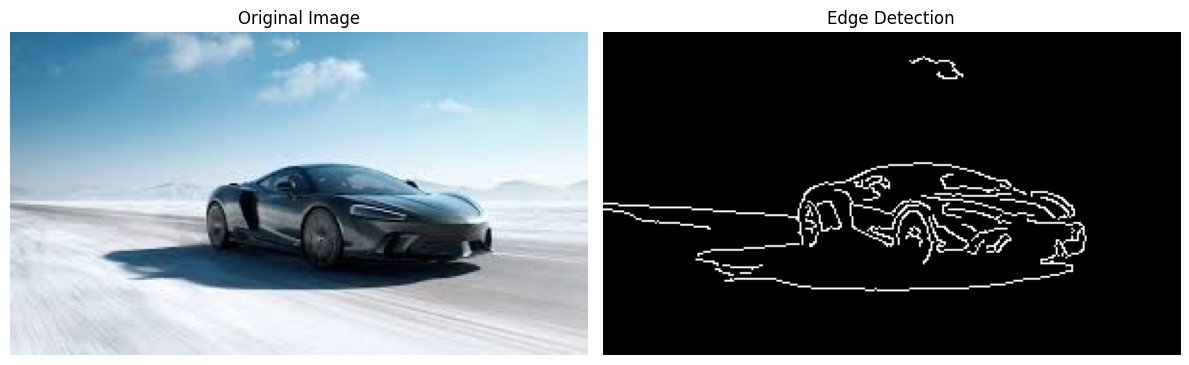

In [9]:
## car
import imutils
import cv2
import matplotlib.pyplot as plt

# Read the image
img = cv2.imread('car.jpeg')

if img is None:
    print("Error: Could not read the image file")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blur = cv2.GaussianBlur(gray, (5, 5), 0)

    edges = cv2.Canny(blur, 50, 150)

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge Detection')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

In [21]:
keypoints= cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

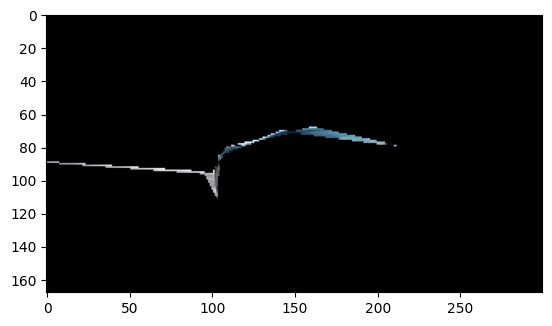

In [22]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) >= 4:
        mask = np.zeros(gray.shape, np.uint8)
        new_image = cv2.drawContours(mask, [approx], 0,255, -1)
        new_image = cv2.bitwise_and(img, img, mask=mask)
        import matplotlib.pyplot as plt
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

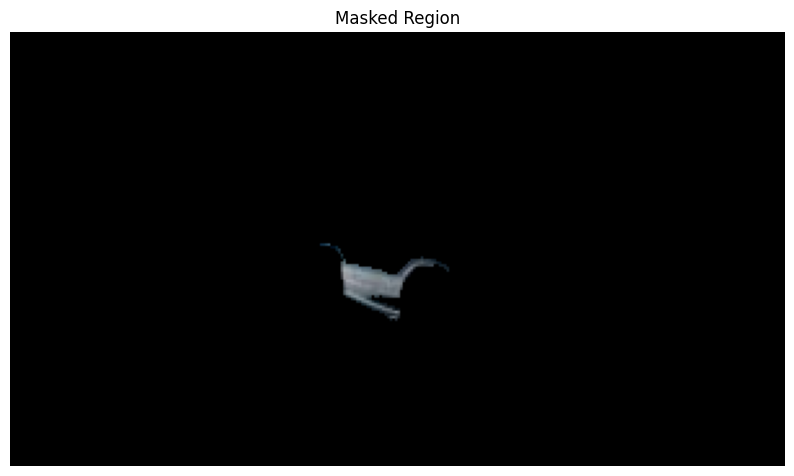

In [26]:
mask = np.zeros(gray.shape, np.uint8)

if contours:
    location = contours[0]

    new_image = cv2.drawContours(mask, [location], 0, 255, -1)

    new_image = cv2.bitwise_and(img, img, mask=mask)

    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
    plt.title('Masked Region')
    plt.axis('off')
    plt.show()
else:
    print("No contours found")

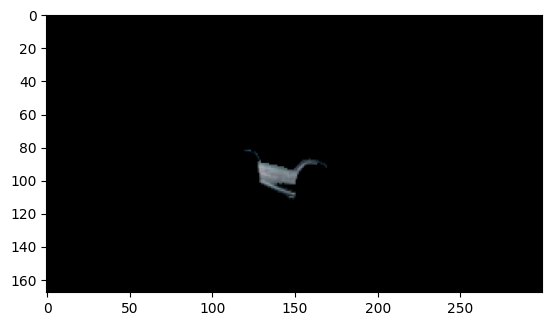

In [27]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))